<a href="https://colab.research.google.com/github/tackulus/204426/blob/main/Lab_10_610510531.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Workshop 10: Feature Extraction**
**คำสั่ง**

1.   ศึกษาวิธีการสกัดคุณลักษณะสำหรับข้อมูลรูปภาพต่อไปนี้
2.   ทำโจทย์ปฏิบัติการแต่ละข้อตามคำสั่ง
3.   ตั้งชื่อไฟล์ python notebook นี้ในรูปแบบ Lab_10_XXXXXXXXX.ipynb โดย XXXXXXXXX คือ รหัสนักศึกษา
4.   ทำการดาวน์โหลดและส่งไฟล์ Lab_10_XXXXXXXXX.ipynb ที่เว็บไซต์ http://hw.cs.science.cmu.ac.th 

In [3]:
import pandas as pd
import numpy as np
import cv2 as cv
from skimage import feature
import zipfile
import glob
import os

from google.colab.patches import cv2_imshow

**Read an image and tramsform to gray image**

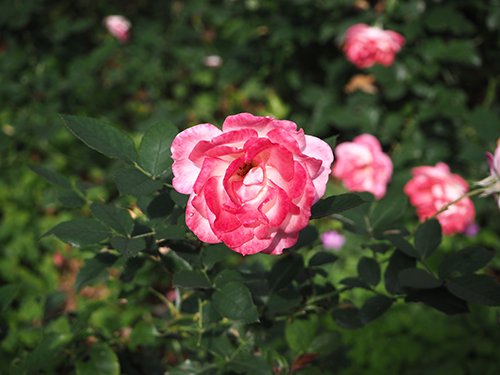

In [ ]:
imgRGB = cv2.imread('sample.jpg')
cv2_imshow(imgRGB)

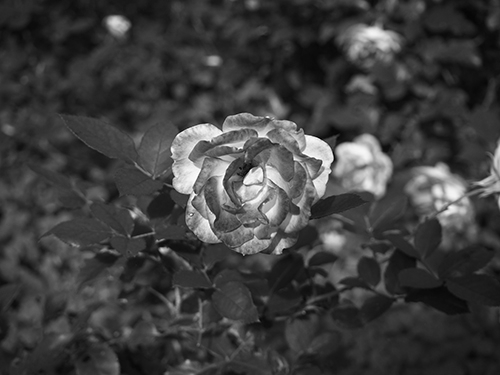

In [ ]:
imgGray = cv2.cvtColor(imgRGB, cv2.COLOR_RGB2GRAY)
cv2_imshow(imgGray)

**Resize the image**

(375, 500)
(200, 200)


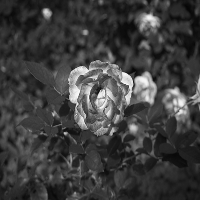

In [ ]:
print(imgGray.shape)
imgGray = cv2.resize(imgGray, (200,200))
print(imgGray.shape)
cv2_imshow(imgGray)

**HOG feature**

In [ ]:
x_hog = feature.hog(imgGray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L1")
print(x_hog.shape)

(20736,)


**LBP feature**

In [ ]:
# Calculate LBP array of gray image
p = 8
r = 1
lbp = feature.local_binary_pattern(imgGray, p, r, method="uniform")
(x_lbp,_) = np.histogram(lbp.ravel(), bins=np.arange(0, p + 3), range=(0, p + 2))

In [ ]:
lbp.shape

(200, 200)

ปฏิบัติการข้อ 1) จงเขียนฟังก์ชันสำหรับสกัด LBP feature สำหรับภาพ 1 ภาพ โดยมีขั้นตอนการทำงาน ดังนี้

1.   แบ่งรูปต้นฉบับออกเป็น block ขนาด nxn จุดภาพ ที่ไม่มีส่วนทับซ้อนกัน 
2.   ทำการสร้าง Histogram ของ LBP ของแต่ละ block
3.   ทำการเชื่อม Histogram ของ LBP ของแต่ละ block เข้าด้วยกันเป็น feature vector
4.   ส่ง feature vector สร้างได้กลับเป็น output ของฟังก์ชัน

In [30]:
def extractLBPFeature(img, n):
    # your code here!
    hists = []

    row, col = img.shape
    p, r = 8, 1

    # Define the window size
    wsize_r = row // n
    wsize_c = col // n

    # Crop out the window and calculate the histogram
    for r in range(0, row, wsize_r):
        for c in range(0, col, wsize_c):
            window = img[r:r+wsize_r, c:c+wsize_c]
            lbp = feature.local_binary_pattern(window, p, r, method="uniform")
            (x_lbp,_) = np.histogram(lbp.ravel(), bins=np.arange(0, p + 3), range=(0, p + 2))
            hists.append(x_lbp)

    out = np.asarray(hists).flatten()
    return out

**Dealing with multiple files**

In [21]:
zip = zipfile.ZipFile('dog_img.zip')
zip.extractall()

dog_img/n02088364_1128.jpg


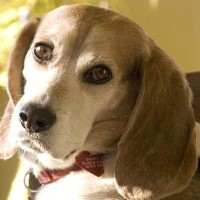

dog_img/n02088364_959.jpg


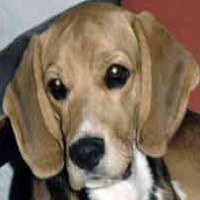

dog_img/n02088364_769.jpg


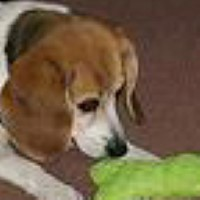

dog_img/n02088364_161.jpg


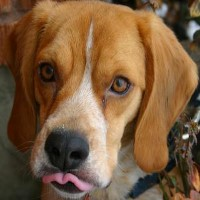

dog_img/n02088364_1384.jpg


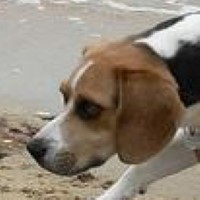

dog_img/n02088364_1507.jpg


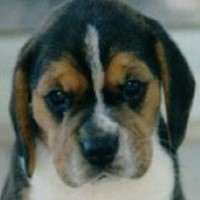

dog_img/n02088364_2000.jpg


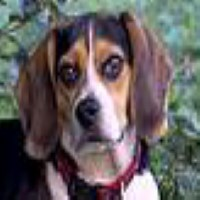

dog_img/n02088364_129.jpg


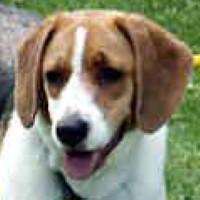

dog_img/n02088364_427.jpg


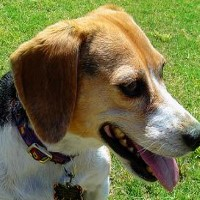

dog_img/n02088364_852.jpg


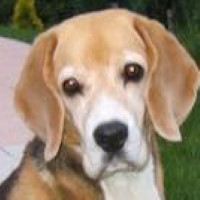

dog_img/n02088364_876.jpg


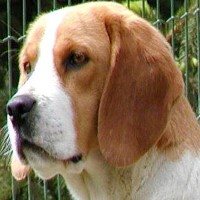

dog_img/n02088364_639.jpg


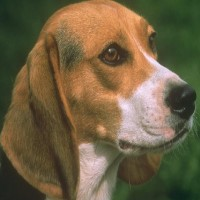

In [22]:
for imgFile in glob.glob(os.path.join('dog_img','*.jpg')):
    print(imgFile)
    tmp_img = cv2.imread(imgFile)
    cv2_imshow(tmp_img)

ปฏิบัติการข้อ 2) สกัดคุณลักษณะของภาพแต่ละภาพในโฟลเดอร์ dog_img แยกเป็น HOG และ LBP Feature (เรียกใช้ฟังก์ชันในข้อ 1) โดยแต่ละแถวเก็บ Feature ของแต่ละภาพ

In [45]:
# your code here!
results = []

for imgFile in glob.glob(os.path.join('dog_img','*.jpg')):
    img = cv2.imread(imgFile, 0)
    HOG_feature = feature.hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm="L1")
    LBP_feature = extractLBPFeature(img, 5)
    features = np.r_[HOG_feature, LBP_feature]
    results.append(features)

results = np.asarray(results)

In [47]:
results.shape

(12, 20986)